<a href="https://colab.research.google.com/github/patty-gz02/Colaboratory/blob/main/Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MINERIA DE DATOS CON PYTHON

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ9wy0zC3uclBO3qvBJQ_hYkFQcHOvqezp6gT_WfcYa6vdP95VUC-0m1yLe8YK1qrdsGOM&usqp=CAU' width=200px>

Mgr. Jose Guzman (jguzmanv@unam.edu.pe)

# Pre-procesamiento

<b>Contenido</b>:
- [Revision de la libreria PANDAS](#pandas)
- [Viendo Tipos de datos](#tiposdatos)
- [Estadisticas Descriptivas](#estadisticasdescriptivas)
- [Análisis Exploratorio Visual](#analisis_visual)
- [Tratando Valores Faltantes](#valoresfaltantes)
- [Operaciones de Pre-procesamiento](#operaciones)

In [ ]:
# Importa algunas librerias base
import pandas as pd
import numpy as np

<a name='pandas'></a>
## <font color=blue>Revision de la libreria PANDAS</font>

### DataFrames

Un DataFrame es una estructura bidimencional (tipo tabla), donde a cada fila se le puede asociar una etiqueta (indice):

Se puede crear un DataFrame desde un diccionario de Series

In [ ]:
import pandas as pd

d = {'X': [1, 2, 3, 4],
     'Y': [5, 6, 7, 8]}
df = pd.DataFrame(d, index=['a', 'b', 'c', 'd'] )
print(df)

   X  Y
a  1  5
b  2  6
c  3  7
d  4  8


Para ver las dimensiones del DataFrame:

In [ ]:
df.shape

(4, 2)

para obtener el indice:

In [ ]:
df1 = df.T   # transpuesta
df1

,a,b,c,d
X,1,2,3,4
Y,5,6,7,8


para obtener los nombres de las filas:

In [ ]:
df1.index

Index(['X', 'Y'], dtype='object')

para obtener los nombres de las columnas:

In [ ]:
df1.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [ ]:
df.columns

Index(['X', 'Y'], dtype='object')

Para recuperar la matriz de valores (array numpy) del DF:

In [ ]:
a = df.values
a

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [ ]:
a[0,0]

1

Se puede crear nuevas columnas a partir de operaciones entre columnas

In [ ]:
df

,X,Y
a,1,5
b,2,6
c,3,7
d,4,8


In [ ]:
df['Z'] = df['X'] + df['Y']
df

,X,Y,Z
a,1,5,6
b,2,6,8
c,3,7,10
d,4,8,12


In [ ]:
df['outlier'] =  (df['X'] >= 3) & (df['Y'] >= 7)
df

,X,Y,Z,outlier
a,1,5,6,False
b,2,6,8,False
c,3,7,10,True
d,4,8,12,True


Para eliminar una columna:

In [ ]:
del( df['Z'] )
df

,X,Y,outlier
a,1,5,False
b,2,6,False
c,3,7,True
d,4,8,True


Insertar una columna

In [ ]:
df.insert(2, 'copia_de_X', df['X'])
df

,X,Y,copia_de_X
b,2,6,2
c,3,7,3
d,4,8,4


Borrar una fila

In [ ]:
df = df.drop(df.index[0])
df


,X,Y
b,2,6
c,3,7
d,4,8


Cambiar algun valor

In [ ]:
df.iloc[0,0] = 10
df

,X,Y
a,10,5
b,2,6
c,3,7
d,4,8


Operaciones entre Dataframes

In [ ]:
d = {'X': [1, 2, 3, 4],
     'Y': [5, 6, 7, 8]}
df1 = pd.DataFrame(d, index=['a', 'b', 'c', 'd'] )
df1

,X,Y
a,1,5
b,2,6
c,3,7
d,4,8


In [ ]:
# suma dataframes
df1 + df

,X,Y,a,b,c,d
X,NaN,NaN,NaN,NaN,NaN,NaN
Y,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN,NaN,NaN
c,NaN,NaN,NaN,NaN,NaN,NaN
d,NaN,NaN,NaN,NaN,NaN,NaN


### Cargando Datos con Pandas

Pandas ofrece várias funciones para cargar datos de una diveridad de formatos.   
Por ejemplo la funcion <b>read_csv()</b>  sirve para leer data tabular de un archivo de texto separado por comas (tambien puede ser otro separador). La funcion retorna un objeto DataFrame. Aqui un ejemplo para leer el archivo pima-indians-diabetes.data.csv  (ver descripcion en https://www.kaggle.com/uciml/pima-indians-diabetes-database):

In [ ]:
# Carga archivo CSV usando Pandas
filename = 'pima-indians-diabetes.data.csv'
feature_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=feature_names)
data.head()  # muestra los primeros registros  (por defecto 5)

FileNotFoundError: ignored

In [ ]:
print(data.shape)

(768, 9)


También se puede cargar archivos directamente de internet. Por ejemplo:

In [ ]:
# Cargar dataset de internet
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data_iris = pd.read_csv(url, names=names)
data_iris.head()  # muestra los primeros 5 registros

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(data_iris.shape)

(150, 5)


In [ ]:
# Si deseo descargar un dataset a la PC

data_iris.to_csv('data_iris_download.csv')
from google.colab import files
files.download('data_iris_download.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a name='tiposdatos'></a>
## <font color=blue>Viendo los tipos de datos de los atributos</font>

Para propósitos de Data Science nos referiremos a las columnas de los Dataframes como <b>atributos</b>.  Una de las primeras cosas que se hace cuando se carga datos de un archivo es inspeccionar el tipo de dato de cada atributo:

In [ ]:
# Carga datos de un archivo csv
filename = "pima-indians-diabetes.data.csv"
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'] # nombres de columnas
data = pd.read_csv(filename, names=col_names) # carga datos del csv y le asigna nombres de columnas(ya que el csv no tiene cabecera)
data.head(5)  # mestra los 5 primeros registros

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail(5)  # mestra los 5 ultimos registros

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Muestra los tipos de datos de cada atributo
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [ ]:
# Podemos obtener informacion mas detallada con el metodo .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<a name='estadisticasdescriptivas'></a>
## <font color=blue>Estadísticas descriptivas</font>

### Operaciones de reduccion de Columnas o Filas
Muchas  veces queremos sumarizar las filas o columnas con alguna operacion de reduccion:
 - conteo: .count()
 - suma: .sum()
 - maximo: .max()
 - minimo: .min()
 - promedio: .mean()
 - desviacion standard: .std()

Por defecto las funciones de reduccion se hacen a nivel de columnas (axis=0). Para hacer la reduccion a nivel de filas debemos pasar el argumento <b>axis=1</b> a la operacion requerida

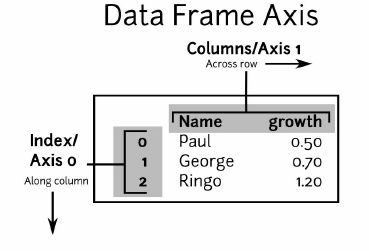

In [ ]:
data.head(2)  # mestra los 2 primeros registros

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
# Cuenta el numero de elementos no nulos en cada columna
data.count()

preg     768
plas     768
pres     768
skin     768
test     768
mass     768
pedi     768
age      768
class    768
dtype: int64

In [ ]:
# valor maximo de cada columna
data.max(axis=0)

preg      17.00
plas     199.00
pres     122.00
skin      99.00
test     846.00
mass      67.10
pedi       2.42
age       81.00
class      1.00
dtype: float64

In [ ]:
# suma los elementos de cada fila
data.sum(axis=1)

0      346.227
1      238.951
2      311.972
3      322.267
4      459.388
        ...   
763    511.071
764    285.140
765    389.445
766    265.449
767    248.715
Length: 768, dtype: float64

In [ ]:
data.median()  # mediana de las columnas

preg       3.0000
plas     117.0000
pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

Una forma rapida de obtener estadisticas sumarias de los atributos es usando el metodo <b>describe()</b> del objeto Dataframe  

In [ ]:
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Podemos cambiar la formatacion general de como pandas muestra los DataFrames usando el metodo <b>set_option</b>

In [ ]:
pd.set_option('display.width', 100)  # setea el ancho que se mostrara en lo sucesivo los DataFrames
pd.set_option('precision', 2)   # setea la cantidad de decimales a mostrar en lo sucesivo en los dataframes
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


#### Grado de balance de la variable class
Una información importante a conocer cuando se proyecta clasificadores es saber qué tan balanceada está la variable objetivo (en este caso <b>class</b>). El metodo <b>value_counts()</b> de un Dataframe permite ver ello  

In [ ]:
# Obtiene conteo de instancias por clase  (class 0 = no diabetes, clase 1 = diabetes)
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

<a name='analisis_visual'></a>
## <font color=blue>Análisis exploratorio visual de los datos</font>

#### Histogramas
Una forma basica de entender una variable es a travez de su histograma. Un histograma agrupa los datos en bins y cuenta el numero de observaciones en cada bin. De este grafico se puede inferir que tipo de distribución sigue la variable. Algunos algoritmos de ML necesitan atributos gausianianos para funcionar adecuadamente. La función <b>hist()</b> de un DataFrame muestra el histograma de cada atributo (columna):   

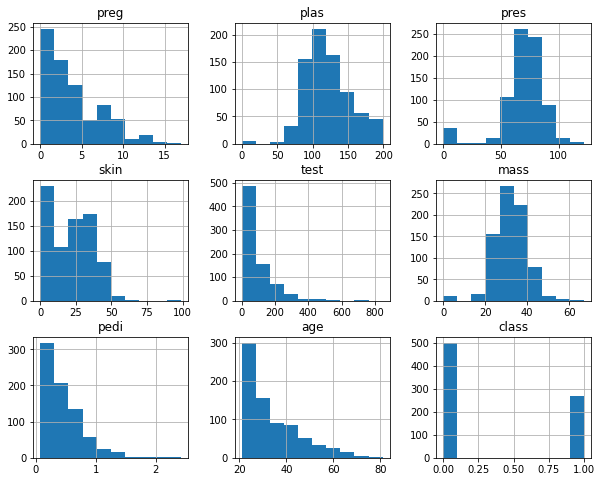

In [ ]:
# Muestra histogramas de los atributos
import matplotlib.pyplot as plt

data.hist(bins=10, figsize=[10,8])  #plotea histograma de cada columna del dataframe con 10 bins
plt.show()

#### Plots de densidad
Son curvas suavizadas ajustadas sobre los histogramas. Se pueden plotear con el metodo <b>plot()</b> de un DataFrame especificando el argumento kind='density'

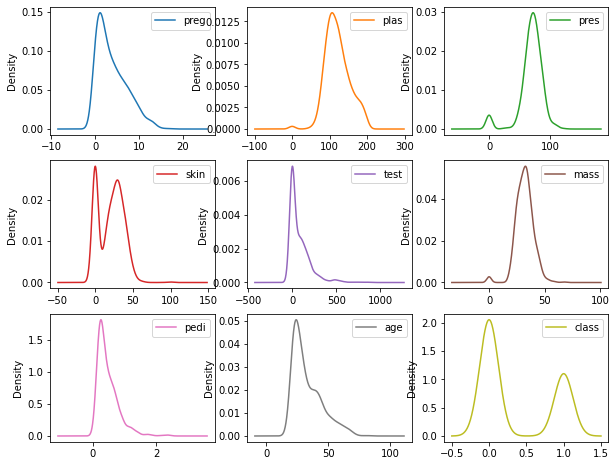

In [ ]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False,  figsize=[10,8])
plt.show()

#### BoxPlots
Sumarizan la distribución de cada atributo. Dibuja una caja entre el 25avo y 75avo percentil. La linea interna es la mediana. Las cotas (whiskers o bigotes) dan una idea de la dispersión de los datos. Puntos fuera del intervalo de los bigotes son candidatos a outliers. Se pueden plotear con el metodo plot() de un DataFrame especificando el argumento kind='box'

In [ ]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False,  figsize=[10,8])
plt.show()

NameError: ignored

#### Plot de Matriz de Correlación
Se puede visualizar las correlaciones entre los diferentes pares de variables para entender la estructura de correlaciones. Algunos modelos pueden tener pobre desempeño cuando las variables de entrada estan fuertemente correlacionadas

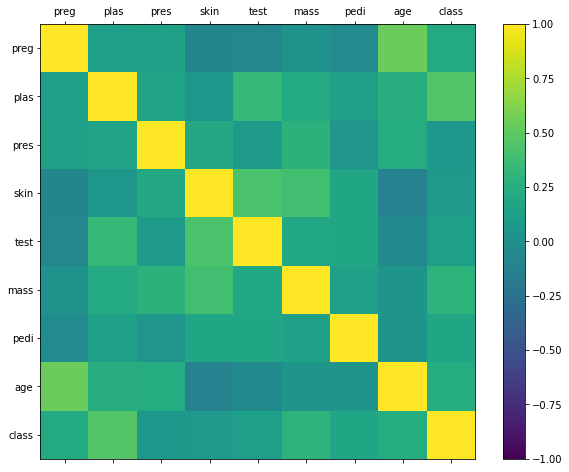

In [ ]:
import numpy

# carga la data
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names)

# plotea la matriz de correlacion
correlations = data.corr() # calcula matriz de correlaciones
fig = plt.figure( figsize=[10,8])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

<a name='valoresfaltantes'></a>
## <font color=blue>Tratando Valores Faltantes</font>

Cuando existe valores faltantes, estos aparecen como valores <b>NaN</b> al importar los datos a un Dataframe

In [ ]:
# Carga datos de un archivo excel  (Iris_missing.xlsx)
filename = "Iris_missing.xlsx"
data = pd.read_excel(filename, header=0) #lee los datos indicandole que la cabecera es la linea 0
data.head(10)  # mestra los 10 primeros registros

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,NaN,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,146.00,146.00,147.00,147.00
mean,5.84,3.05,3.77,1.18
std,0.83,0.43,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
# Obtiene conteo de instancias por clase
data['class'].value_counts()

Iris-versicolor    50
Iris-setosa        49
Iris-virginica     49
Name: class, dtype: int64

### Viendo si hay valores faltantes
La funcion <b>isnull()</b> de un DataFrame marca cada celda NaN con True. Haciendo sum() podemos obtener el conteo de datos faltantes por columna:

In [ ]:
data.isnull()

,sepal-length,sepal-width,petal-length,petal-width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
# Chequea cuantos valores faltantes hay en cada columna
data.isnull().sum()

sepal-length    4
sepal-width     4
petal-length    3
petal-width     3
class           2
dtype: int64

In [ ]:
# Chequea si algun valor del Dataframe es faltante (valor NaN)
data.isnull().values.any()

True

### Eliminando filas o columnas con valores faltantes

La funcion <b>dropna()</b> devuelve un DataFrame sin las filas (o columnas si se especifica argumento axis=1) que contengan algun valor faltante en el DataFrame. Recuerde que toda operacion sobre dataframe genera un nuevo dataframe, a menos que se coloque el argumento <b>inplace=True</b>)

In [ ]:
data1 = data.dropna() # elimina las filas que tienen valores faltantes en data
data1.head(10)  #muestra los 10 primeros registros del dataframe sin valores faltantes

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


In [ ]:
# muestra la cantidad de valores faltantes en cada columna de data1
data1.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [ ]:
# para eliminar las columnas con valores faltantes se tiene que especificar axis=1 como argumento de dropna
data1 = data.dropna(axis=1)
data1.head()

""
0
1
2
3
4


In [ ]:
# Para eliminar solo las filas donde todos sus valores son NaN podemos especificar el argumento how='all'
data1 = data.dropna(how='all')
data1.shape

(150, 5)

In [ ]:
# Para eliminar las filas con menos de 4 elementos no faltantes (osea 2 o mas elementos faltantes)
data1 = data.dropna(thresh=4)
data1.shape

(147, 5)

In [ ]:
# Para eliminar las filas cuyo valor faltante aparece en columnas especificadas
data1 = data.dropna(subset=['class']) # elimina filas cuyo valor faltante esta en la columna class
data1.shape

(148, 5)

### Imputando valores faltantes

La funcion <b>fillna()</b> devuelve un DataFrame con valores faltantes imputados a nivel de columnas. Se le puede pasar como valores a imputar las medias de las columnas (o cualquier otra operacion de reduccion a nivel de columna)

In [ ]:
# imputa los valores faltantes de cada columna numerica con la media de la columna
data1 = data.fillna(data.mean())
data1.isnull().sum() # muestra cuantos valores NaN hay por cada columna

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           2
dtype: int64

In [ ]:
data1.head(10) # muestra los 10 primeros registros

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.50,1.4,0.2,Iris-setosa
1,4.9,3.00,1.4,0.2,Iris-setosa
2,4.7,3.20,1.3,0.2,Iris-setosa
3,4.6,3.10,1.5,0.2,Iris-setosa
4,5.0,3.60,1.4,0.2,Iris-setosa
5,5.4,3.90,1.7,0.4,Iris-setosa
6,4.6,3.40,1.4,0.3,Iris-setosa
7,5.0,3.40,1.5,0.2,Iris-setosa
8,4.4,3.05,1.4,0.2,Iris-setosa
9,4.9,3.10,1.5,0.1,Iris-setosa


In [ ]:
# imputa los valores faltantes de las columnas categoricas con la moda de las columnas
data1 = data1.fillna(data1.mode().iloc[0])
data1.isnull().sum()  # muestra cuantos valores NaN hay por cada columna

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [ ]:
data1.isnull().values.any()

False

<a name='operaciones'></a>
## <font color=blue>Operaciones de Re-escalamiento, Estandarización, Normalización y Binarización de atributos</font>

Las operaciones de re-escalamiento, estandarizacion, normalización y binarización de los atributos son frecuentemente requeridas en el proceso de análisis de datos. Para realizar dichas tareas nos valdremos de la libreria <b>sklearn</b>, especificamente de su modulo preprocesing. <b>Es recomendable que estas tareas se hagan sobre data sin valores faltantes</b>, por lo que se recomienda imputar o eliminar los NaN.

Los ejemplos mostrados en esta seccion se haran sobre la data imputada de Iris_missing.xlsx



In [ ]:
# Carga datos de un archivo excel  (Iris_missing.xlsx)
filename = "Iris_missing.xlsx"
data = pd.read_excel(filename, header=0) #lee los datos indicandole que la cabecera es la linea 0
data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,146.000000,146.000000,147.000000,147.000000
mean,5.841096,3.052740,3.765986,1.183673
std,0.825262,0.434256,1.771173,0.763108
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# imputa los valores faltantes de cada columna numerica con la media de la columna
data_imputed = data.fillna(data.mean())

# imputa los valores faltantes de las columnas categoricas con la moda de las columnas
data_imputed = data.fillna(data.mode().iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
data.mode()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.0,3.0,1.5,0.2,Iris-versicolor
1,6.3,NaN,NaN,NaN,NaN


In [ ]:
# verifica si hay valores faltantes
data_imputed.isnull().values.any()

False

In [ ]:
data_imputed.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.818667,3.051333,3.720667,1.164000
std,0.825385,0.428473,1.781911,0.767921
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Re-escalamiento de atributos**
La operacion de re-escalamiento transforma los atributos de entrada a un mismo intervalo. La clase <b>MinMaxScaler</b> de la libreria scikit-learn nos facilita implementar una operacion de escalamiento



In [ ]:
# Importa la funcion MinMaxScaler de la libreria sklearn que hace la operacion de reescalamiento
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Obtiene los atributos numericos que se quieren reescalar
X = data_imputed[['sepal-length','sepal-width','petal-length','petal-width']]

# Define el operador de escalamiento (escalador) para escalar columnas entre [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))

# Rescala los atributos entre 0 y 1.
rescaledX = scaler.fit_transform(X)  # realiza el escalado de X. El resultado es un array numpy

# imprime las 5 primeras muestras de datos re-escalados:
print(rescaledX[0:5,:])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


In [ ]:
# convierte el array reescalado a Dataframe y muestra sus estadisticas
data_rescaled = pd.DataFrame(rescaledX, columns=['sepal-length','sepal-width','petal-length','petal-width'])
data_rescaled.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,0.421852,0.438056,0.461130,0.443333
std,0.229274,0.178530,0.302019,0.319967
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.084746,0.083333
50%,0.402778,0.416667,0.559322,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


### **Estandarizacion de atributos**
La operacion de estandarización transforma los atributos de entrada para que tengan una media 0 y una varianza 1. La clase <b>StandardScaler</b> de la libreria scikit-learn nos facilita la operacion de estandarización

In [ ]:
# Importa la funcion StandardScaler de la libreria sklearn que hace la operacion de estandarizacion
from sklearn.preprocessing import StandardScaler

In [ ]:
# Obtiene los atributos numericos que se quieren estandarizar
X = data_imputed[['sepal-length','sepal-width','petal-length','petal-width']]

# Define el operador de estandarizacion (estandarizador) para estandarizar columnas
standardizer = StandardScaler()

# Estandariza los atributos de X.
standardizedX = standardizer.fit_transform(X)  # realiza la estandarizacion de X. El resultado es un array numpy

# imprime las 5 primeras muestras de datos estandarizados:
print(standardizedX[0:5,:])

[[-0.87362201  1.05063821 -1.30670995 -1.25954365]
 [-1.11674502 -0.12020675 -1.30670995 -1.25954365]
 [-1.35986802  0.34813124 -1.36301747 -1.25954365]
 [-1.48142953  0.11396224 -1.25040242 -1.25954365]
 [-0.99518351  1.2848072  -1.30670995 -1.25954365]]


In [ ]:
# convierte el array estandarizado a un Dataframe y muestra sus estadisticas
data_standardized = pd.DataFrame(standardizedX, columns=['sepal-length','sepal-width','petal-length','petal-width'])
data_standardized.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,8.023212e-16,-6.892635e-17,6.291264e-17,5.151435e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.846114e+00,-2.461897e+00,-1.531940e+00,-1.390202e+00
25%,-8.736220e-01,-5.885447e-01,-1.250402e+00,-1.128886e+00
50%,-8.347223e-02,-1.202067e-01,3.262083e-01,1.776950e-01
75%,7.066775e-01,5.823002e-01,7.766685e-01,8.309852e-01
max,2.530100e+00,3.158159e+00,1.790204e+00,1.745592e+00


### **Normalizacion de filas**
La operacion de normalizacion transforma los datos de tal forma que cada fila suma 1. Se usa cuando la información relevante está en la importancia relativa de los atributos de entrada en cada muestra y no en los valores absolutos. La clase <b>Normalizer</b> de la libreria scikit-learn nos facilita la operacion de normaalización

In [ ]:
# Importa la funcion Normalizer de la libreria sklearn que hace la operacion de normalización
from sklearn.preprocessing import Normalizer

In [ ]:
# Obtiene los atributos numericos que se quieren estandarizar
X = data_imputed[['sepal-length','sepal-width','petal-length','petal-width']]

# Define el operador de normalizacion (normalizer) para normalizar las filas.
# El argumento norm indica el tipo de norma: norm="l1" hace que la suma de la fila sea igual a 1
# norm="l2"  hace que norma euclidiana de cada fila sea igual a 1
normalizer = Normalizer(norm="l2")

# Estandariza los atributos de X.
normalizedX = normalizer.fit_transform(X)  # realiza la estandarizacion de X. El resultado es un array numpy

# imprime las 5 primeras muestras de los datos normalizados:
print(normalizedX[0:5,:])

[[0.80377277 0.55160877 0.22064351 0.0315205 ]
 [0.82813287 0.50702013 0.23660939 0.03380134]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.80003025 0.53915082 0.26087943 0.03478392]
 [0.790965   0.5694948  0.2214702  0.0316386 ]]


In [ ]:
# convierte el array normalizado a un Dataframe y muestra la suma de las filas
data_normalized = pd.DataFrame(normalizedX, columns=['sepal-length','sepal-width','petal-length','petal-width'])
data_normalized.sum(axis=1)

0      1.607546
1      1.605564
2      1.610666
3      1.634844
4      1.613569
         ...   
145    1.852356
146    1.818343
147    1.840954
148    1.882549
149    1.698924
Length: 150, dtype: float64

### **Binarización de atributos**
Es una operacion donde se aplica un umbral y todos los valores mayores al umbral son colocados en 1, de lo contrario son colocados en 0. La clase <b>Binarizer</b> de scikit-learn facilita esta operacion.

In [ ]:
# Importa la funcion Binarizer de la libreria sklearn que hace la operacion de binarizacion
from sklearn.preprocessing import Binarizer

In [ ]:
# Obtiene los atributos numericos que se quieren estandarizar
X = data_imputed[['sepal-length','sepal-width','petal-length','petal-width']]

# Define el operador de binarización (binarizer) para binarizar los datos.
binarizer = Binarizer(threshold=0.3)  # define un binarizador con umbral igual a 0.3

# Binariza los atributos de X.
binarizerX = binarizer.fit_transform(X)  # realiza la binarizacion de X. El resultado es un array numpy

# imprime las 5 primeras muestras de datos binarizados:
print(binarizerX[0:5,:])

[[1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]
 [1. 1. 1. 0.]]


In [ ]:
# convierte el array binarizado a un Dataframe y muestra una parte del mismo
data_binarized = pd.DataFrame(binarizerX, columns=['sepal-length','sepal-width','petal-length','petal-width'])
data_binarized.head(10)

,sepal-length,sepal-width,petal-length,petal-width
0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0
5,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,0.0
7,1.0,1.0,1.0,0.0
8,1.0,1.0,1.0,0.0
9,1.0,1.0,1.0,0.0
